# Linear Regression

- Y=a+bx+b1 x1+b2 x1.........
- Y is dependent(Target)(1) [1D]
- x is independent(features) (n) [2D]

In [1]:
import sklearn

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [3]:
#Independent
time=np.array([5,7,12,16,20]).reshape(-1,1)

In [4]:
#Dependent
mass=np.array([40,120,180,210,240])

In [5]:
mm=LinearRegression()
#model.fit(ind,dep)
mm.fit(time,mass)

LinearRegression()

In [6]:
x=int(input("Enter the time in minutes:"))
result=mm.predict([[x]]) #passing ind var(time in 2D)
print("If the time is",x,"minutes,","the mass is",result[0],"grams.")

Enter the time in minutes: 23


If the time is 23 minutes, the mass is 292.28571428571433 grams.


In [7]:
x=int(input("Enter the time in minutes:"))
result=mm.predict([[x]]) #passing ind var(time in 2D)
print("If the time is",x,"minutes,","the mass is",result[0],"grams.")

Enter the time in minutes: 32


If the time is 32 minutes, the mass is 402.1558441558442 grams.


In [8]:
x=int(input("Enter the time in minutes:"))
result=mm.predict([[x]]) #passing ind var(time in 2D)
print("If the time is",x,"minutes,","the mass is",result[0],"grams.")

Enter the time in minutes: 10


If the time is 10 minutes, the mass is 133.58441558441558 grams.


In [9]:
mass_m=mm.predict(time)
print(mass_m)

[ 72.54545455  96.96103896 158.         206.83116883 255.66233766]


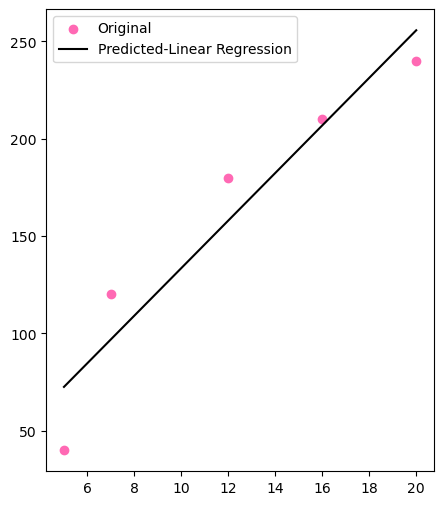

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,6))
plt.scatter(time,mass,label="Original",color="hotpink")
plt.plot(time,mass_m,label='Predicted-Linear Regression',color='k')
plt.legend()
plt.show()

# Evaluation

R-Square

- larger,the better

In [11]:
r2score=r2_score(time,mass)
print(r2score)

-831.8181818181819


MSE

Lower,the better

In [12]:
mse=mean_squared_error(time,mass_m)
print(mse)

25184.929870129872


MAE

Loer the better

In [13]:
mae=mean_absolute_error(time,mass_m)
print(mae)

146.0


# Linear Regression on large data

Case: Predicting the salary from age,experience,gender and education

1. Importing Libraries
2. Load Data
3. clean data(nulls,duplicates)
4. Preprocess(encoding,scaling)
5. Split Data
6. Create and Train model
7. Test the model
8. Evaluation

1.Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

2.Loading data

In [15]:
sl=pd.read_csv(r"C:\Users\Megha I Angadi\Downloads\Salary_EDA.csv")

In [16]:
sl

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


Data preprocessing

In [56]:
ge=LabelEncoder()
sl["Gender_encode"]=ge.fit_transform(sl["Gender"])
sl.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_encode,Job_encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,154
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,16
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,126
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,97
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,97


In [57]:
ge1=LabelEncoder()
sl["Job_encode"]=ge1.fit_transform(sl["Job Title"])
sl.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_encode,Job_encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,154
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,16
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,126
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,97
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,97


split ind,dep

In [58]:
X=sl[["Age","Gender_encode","Job_encode","Years of Experience"]]
Y=sl["Salary"]

Clean data

In [59]:
sl.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Gender_encode          0
Job_encode             0
dtype: int64

In [60]:
sl.dropna(inplace=True)

In [61]:
sl.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Gender_encode          0
Job_encode             0
dtype: int64

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size = 0.2,random_state=42)

In [69]:
Sal_m=LinearRegression()
Sal_m.fit(X_train,Y_train)

LinearRegression()

In [70]:
a=float(input("Enter your age:"))
g=input("Enter your gender:")
j=input("Enter your job:")
exp=float(input("Enter your job experience:"))

Enter your age: 23
Enter your gender: Female
Enter your job: Data Analyst
Enter your job experience: 2


In [71]:
gen_e=ge.transform([g])[0]
job_e=ge1.transform([j])[0]
print(gen_e,job_e)

0 16


Evaluation

1. Predict test value
2. Visualize
3. Metrics

In [72]:
model_p=Sal_m.predict(X_test)

In [73]:
len(Y_test)

74

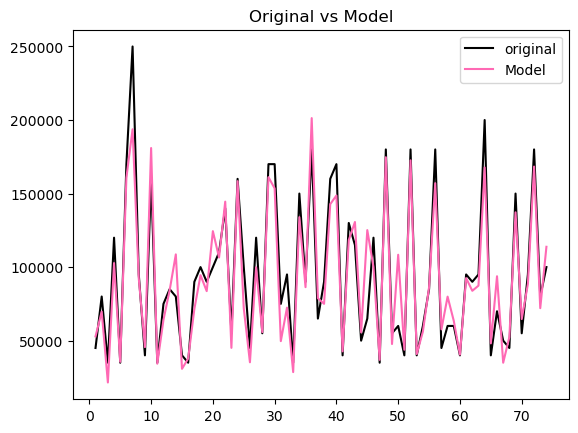

In [74]:
plt.plot(np.arange(1,75),Y_test,color='k',label="original")
plt.plot(np.arange(1,75),model_p,color="hotpink",label="Model")
plt.title("Original vs Model")
plt.legend()
plt.show()

In [79]:
r2score1=r2_score(Y_test,model_p)
print(r2score1)
if r2score1>0.5:
    print("Model is good fit")
else:
        print("Model is not good fit")  

0.8842664537334551
Model is good fit


MSE

In [78]:
mse1=mean_squared_error(Y_test,model_p)
print(mse1)

298039243.26080877


MAE

In [80]:
mae1=mean_absolute_error(Y_test,model_p)
print(mae1)

12680.549460109363
